In [1]:
import glob
import cv2
import torch
import numpy as np
import torch.nn.functional as F

import time

# Record the start time
start_time = time.time()


def rgb_to_gray_image_conversion(filelist):

    rgb_image_list = []
    gray_image_list = []



    for file in filelist:
        image_rgb = cv2.imread(file)
        
        rgb_image_list.append(image_rgb)
        
        gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)
        
        gray_image_list.append(gray_image)
        

    return gray_image_list,rgb_image_list  


def file_to_gray(gray_image_list,index_no):

    
    gray_image = gray_image_list[index_no]
    gray_image = torch.tensor(gray_image).float()
    
    padded_gray_image = F.pad(gray_image, (1, 1, 1, 1), 'constant', 0)
    
    
    return padded_gray_image.detach().numpy() 




# filelist = glob.glob('2000/*.png')
# filelist.sort()

# print(filelist)


#gray_image_list,rgb_image_list = rgb_to_gray_image_conversion(filelist)

# print(file_to_gray(gray_image_list,0).shape)



In [2]:
import torch
import torch.nn.functional as F

def getIndices(x,kernel_size_h,kernel_size_w,stride_h,stride_w):
    
    indices = {}
    stride = 2
    kernel_size = 2
    h_out = (x.size(0) - kernel_size_h) // stride_h + 1
    w_out = (x.size(1) - kernel_size_w) // stride_w + 1

    for i in range(h_out):
        for j in range(w_out):
            start_i = i * stride_h
            start_j = j * stride_w
            end_i = start_i + kernel_size_h
            end_j = start_j + kernel_size_w
            
            indices[(i, j)] = [
                (start_i, start_j),               # top-left
                (start_i, end_j-1),               # top-right
                (end_i-1, start_j),               # bottom-left
                (end_i-1, end_j-1)                # bottom-right
            ]

    return indices


x = torch.arange(0,332*316, dtype=torch.float).reshape(332,316)
#print("Original tensor:\n", x)


padded_x = F.pad(x, (1, 1, 1, 1), 'constant', 0)
#print("\nPadded tensor:\n", padded_x)


# Applying average pooling
y = F.avg_pool2d(padded_x.unsqueeze(0).unsqueeze(0), kernel_size = (2,2), stride=(2,2)).squeeze()
#print("\nAfter avg pooling:\n", y)

y_output  = F.avg_pool2d(y.unsqueeze(0).unsqueeze(0), kernel_size = (2,2), stride=(2,2)).squeeze()
#print("\nAfter avg pooling:\n", y_output)

indices1= getIndices(padded_x,2,2,2,2)


indices2= getIndices(y,2,2,2,2)


print('indices1')
print(len(indices1))
print('indices2')
print(len(indices2))
combined_indices = {}

for key2, value2 in indices2.items():
    temp_dict = {}
    
    # Fetching corresponding regions from indices1 and storing them
    for idx in value2:
        temp_dict[idx] = indices1[idx]
    
    # Storing the indices from indices2
    #temp_dict['indices2'] = value2
    
    combined_indices[key2] = temp_dict

# Now, the combined_indices dict has the values of indices1 stored inside values from indices2


def getIndices_in_orginal_gray(row,col):
    indices_list_gray_image = [index for sublist in combined_indices[(row,col)].values() for index in sublist]
    # print(indices_list_gray_image)

    # print(len(indices_list_gray_image))
    
    return indices_list_gray_image


# print(len(getIndices_in_orginal_gray(2,3)))
# print(getIndices_in_orginal_gray(0,0))




indices1
26553
indices2
6557


In [3]:
import pandas as pd
import numpy as np

def getKernel(input):
    
    df = pd.DataFrame(input)

    

    result_df = pd.DataFrame()

    # # Block sizes
    # block_row_size = 83*2
    # block_col_size = 79*2

    # for i in range(0, df.shape[0], block_row_size):
    #     for j in range(0, df.shape[1], block_col_size):
    #         block = df.iloc[i:i+block_row_size, j:j+block_col_size]
    #         #print(block.values)
    #         avg = np.mean(block.values)
    #         std = np.std(block.values)
    #         result_df.loc[i//block_row_size, j//block_col_size] = avg / std


    result_df = np.ones((2,2))
    #print(result_df)
    
    return np.array(result_df)

In [4]:
import numpy as np


def minusArray(arr2,arr1):
    
    arr1 = arr1.astype(np.int32)
    arr2 = arr2.astype(np.int32)


    arr = arr2 - arr1
    
    return arr
            



def get_diff_gray_image_kernel_list(gray_image_list):

    diff_gray_image_list = []
    diff_gray_image_kernel_list_2_2 = []

    for i in range(len(gray_image_list)-1):
        
        arr = minusArray(gray_image_list[i+1],gray_image_list[i])

        #np.savetxt('test'+str(i)+'.txt',arr , delimiter='\t', fmt='%d')
        
        diff_gray_image_list.append(arr)
        #print(diff_gray_image_list)
    
        
        kernel_arr = getKernel(arr)
        #np.savetxt('test_kernel'+str(i)+'.txt',kernel_arr , delimiter='\t', fmt='%d')
    
        diff_gray_image_kernel_list_2_2.append(kernel_arr)
        

    # print(len(gray_image_list))
    # print(gray_image_list)
    # print(len(diff_gray_image_list))
    # print(diff_gray_image_list)
    # print(len(diff_gray_image_kernel_list_2_2))
    # print(diff_gray_image_kernel_list_2_2)


    return diff_gray_image_list, diff_gray_image_kernel_list_2_2




In [5]:
# np.savetxt('20220901'+'.txt',gray_image_list[0] , delimiter='\t', fmt='%d')
# np.savetxt('20220902'+'.txt',gray_image_list[1] , delimiter='\t', fmt='%d')

# for i in range(len(diff_gray_image_list)):
#     np.savetxt(str(i+2)+str('-')+str(i+1)+'.txt',diff_gray_image_list[i] , delimiter='\t', fmt='%d')
    

In [6]:
import torch
import torch.nn as nn

import torch
import torch.nn as nn

def apply_3x3_sharpening(input_tensor,kernel):
    # Assuuming input is a 2D matrix, we reshape it to [1, 1, height, width]
    input_tensor = input_tensor.unsqueeze(0).unsqueeze(0)

    # Define the 2x2 sharpening kernel
    kernel_tensor = kernel.unsqueeze(0).unsqueeze(0)
    
    #print(kernel_tensor)
    

    
    kernel_row,kernel_col = len(kernel_tensor), len(kernel_tensor[0])


    # Define the convolutional layer
    conv_layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(kernel_row,kernel_col), stride=(2,2), padding=1, bias=False)
    conv_layer.weight.data = kernel_tensor

    # Apply convolution for sharpening
    output = conv_layer(input_tensor)

    return output[0,0]

def get_kernel_applied_result_in_diff_gray_image(diff_gray_image_list,diff_gray_image_kernel_list_2_2):

    kernel_applied_result_in_diff_gray_image = []
    for i in range(len(diff_gray_image_list)):
        matrix = torch.tensor(diff_gray_image_list[i]).float()
        kernel = torch.tensor(diff_gray_image_kernel_list_2_2[i]).float()

        # print("Input matrix:\n", matrix)

        result = apply_3x3_sharpening(matrix,kernel).detach().numpy()
        # print("\nResult after 2x2 sharpening:\n", result)



        #np.savetxt('test_after_apply_kernel'+str(i)+'.txt',result, delimiter='\t', fmt='%d')

        # print(result.shape)
        
        kernel_applied_result_in_diff_gray_image.append(result)


    return kernel_applied_result_in_diff_gray_image
    
# diff_gray_image_list, diff_gray_image_kernel_list_2_2 = get_diff_gray_image_kernel_list(gray_image_list)
# np.savetxt('kerenel_applied_diff_2-1.txt', get_kernel_applied_result_in_diff_gray_image(diff_gray_image_list,diff_gray_image_kernel_list_2_2)[0], delimiter='\t', fmt='%d')

In [7]:
import numpy as np

def truncating_array_83_79(original_array):

    # Define the pooling parameters
    pool_size = (2, 2)
    stride = 2

    # Calculate the dimensions of the output array
    output_height = (original_array.shape[1] - pool_size[0]) // stride + 1
    output_width = (original_array.shape[2] - pool_size[1]) // stride + 1


    # Initialize the output array
    output_array = np.zeros((original_array.shape[0], output_height, output_width, 4))

    # Apply 2x2 average pooling with a stride of 2
    for i in range(output_height):
        for j in range(output_width):
            # Define the pooling region
            region = original_array[:, i * stride:i * stride + pool_size[0], j * stride:j * stride + pool_size[1]]
            # Reshape the region to a (4,) array and store it in the output array
            #print(region)
            output_array[:, i, j] = region.reshape(-1, 4)


    data = output_array

    # Reshape the data into a (83, 79) array where each grid has a list of values with shape 4x4858
    reshaped_data = data #data.swapaxes(0, 3).reshape(83, 79, -1)


    return reshaped_data



In [8]:
kernel_applied_result_in_diff_gray_image_overall =  []
for year in range(2000,2024):
    filelist = glob.glob(str(year)+'/*.png')
    filelist.sort()

    


    gray_image_list,rgb_image_list = rgb_to_gray_image_conversion(filelist)
    diff_gray_image_list, diff_gray_image_kernel_list_2_2 = get_diff_gray_image_kernel_list(gray_image_list)

  

    temp_arr = get_kernel_applied_result_in_diff_gray_image(diff_gray_image_list,diff_gray_image_kernel_list_2_2)

    print(np.array(temp_arr).shape)
    

    non_zero_values = temp_arr

    kernel_applied_result_in_diff_gray_image_overall += list(non_zero_values)


    






(211, 167, 159)
(211, 167, 159)
(211, 167, 159)
(212, 167, 159)
(211, 167, 159)
(211, 167, 159)
(211, 167, 159)
(212, 167, 159)
(211, 167, 159)
(211, 167, 159)
(211, 167, 159)
(212, 167, 159)
(211, 167, 159)
(211, 167, 159)
(211, 167, 159)
(212, 167, 159)
(211, 167, 159)
(211, 167, 159)
(211, 167, 159)
(212, 167, 159)
(211, 167, 159)
(211, 167, 159)
(211, 167, 159)
(212, 167, 159)


In [9]:
data_for_calculating_83_79 = truncating_array_83_79(np.array(kernel_applied_result_in_diff_gray_image_overall))



In [10]:
print(data_for_calculating_83_79.shape)

(5070, 83, 79, 4)


1.5


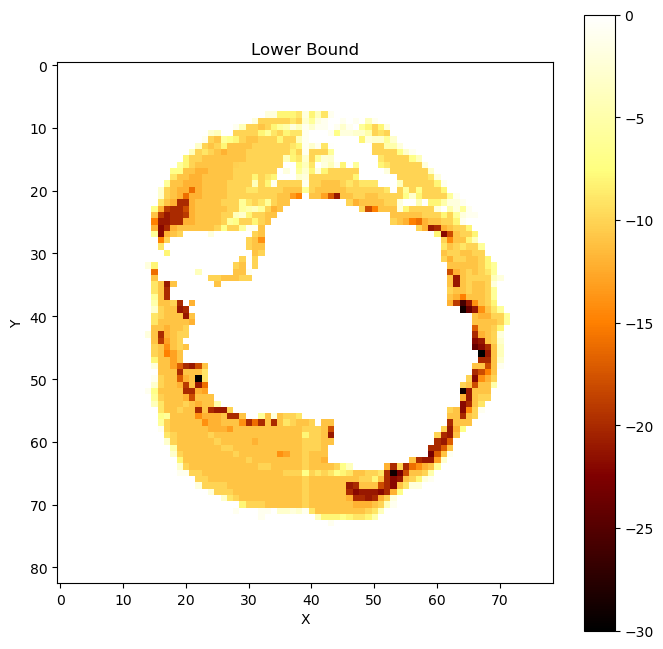

In [11]:


import numpy as np
import glob
import datetime
from datetime import date
from datetime import timedelta
# import datetime
# from dateutil.relativedelta import relativedelta
# from datetime import datetime
# import pandas as pd
import os
from netCDF4 import Dataset
import netCDF4 as nc
import xarray as xr
# from osgeo import gdal
# import geopandas as gpd
# from shapely.geometry import MultiPolygon, Polygon, Point
# from scipy import io
import pandas as pd
from scipy.stats import iqr

list_of_files = glob.glob('*lb*q1.txt')  # create the list of file
x= data_for_calculating_83_79

row, col = 83,79
intial = 15
#for kk in np.arange(1.5, , 0.1):
kk = 1.5
print(kk)

lower_bound, q1_for_future_use =np.zeros((row,col)),np.zeros((row,col))

for i in range(row):
    for j in range(col):
        q1=np.percentile(x[:,i,j,:], 25)

        iqr1=iqr(x[:,i,j,:])
        
        lb=q1-kk*iqr1
        lower_bound[i,j]= lb
        q1_for_future_use[i,j] = q1

np.savetxt('lb'+str(intial)+'.txt', lower_bound, delimiter='\t', fmt='%.4f')
np.savetxt('q1'+str(intial)+'.txt', q1_for_future_use, delimiter='\t', fmt='%.4f')

intial += 1

       
        
        
# Create a figure and axis


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 8))

# Display the 2D matrix as an image
im = ax.imshow(q1_for_future_use, cmap='afmhot')  # You can change the colormap to your preference

# Add a colorbar to the plot (optional)
cbar = fig.colorbar(im, ax=ax)

# Set labels and title (optional)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Lower Bound')

# Show the plot
plt.show()   

In [12]:
import glob
import cv2
import torch
import numpy as np
import torch.nn.functional as F
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


def rgb_to_gray_image_conversion(filelist):

    rgb_image_list = []
    gray_image_list = []

    for file in filelist:
        image_rgb = cv2.imread(file)
        rgb_image_list.append(image_rgb)

        gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)
        gray_image_list.append(gray_image)

    return gray_image_list, rgb_image_list


total_outputs = []


counter1 = 0

counter2 = 0


year_trace = {}
for year in range(2000, 2024):
    
    filelist = glob.glob(str(year)+'/*.png')
    filelist.sort()
    print(filelist)

    gray_image_list, rgb_image_list = rgb_to_gray_image_conversion(filelist)
    


    # year_trace.append(len(gray_image_list)-1)
    for i in range(len(gray_image_list)-1):

        arr = gray_image_list[i+1].astype(np.int32) - gray_image_list[i].astype(np.int32)

        total_outputs.append(arr)

        counter2 +=1
    
    year_trace[year] = [counter1,counter2]

    counter1 = counter2

    

        
    

   

      
print(year_trace)
device = 'mps'





# Assuming lower_bound and q1_for_future_use are defined elsewhere
lower_bound1 = torch.from_numpy(lower_bound).float().to(device)
q1 = torch.from_numpy(q1_for_future_use).float().to(device)



class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=2, stride=2, padding=1)
        self.mean_pool = nn.AvgPool2d(kernel_size=2, stride=2)
        self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Set kernel weights to [[1, 1], [1, 1]] and prevent them from being updated
        with torch.no_grad():
            self.conv1.weight = nn.Parameter(torch.tensor([[[[1.0, 1.0], [1.0, 1.0]]]], device=device))
            self.conv1.weight.requires_grad = False
            self.mean_pool.requires_grad = False
            self.max_pool.requires_grad = False


    def forward(self,x):
        org_x = x
        conv_x = self.conv1(x)
        anomaly_discord_array = torch.full_like(x, 1)

        # Remove positive values
        x_negative_removed = torch.where(conv_x > 0, torch.tensor(0.0).to(x.device), conv_x)
        x_abs = torch.abs(x_negative_removed)
        x_max_pooled = self.max_pool(x_abs)
        x_max_pooled_negative = x_max_pooled * -1
        x_mean_pooled = self.mean_pool(conv_x)

        condition1 = x_max_pooled_negative < lower_bound1
        condition2 = (x_mean_pooled / x_max_pooled_negative) > (q1 / lower_bound1)
        condition = condition1 & condition2

        for batch_index in range(condition.shape[0]):
            anomaly_discord_all_row_col_list = []
            get_indices_anomaly = condition[batch_index].nonzero(as_tuple=True)
            indices_anomaly = list(zip(get_indices_anomaly[1].cpu().numpy(), get_indices_anomaly[2].cpu().numpy()))

            for idx in indices_anomaly:
                i, j = idx
                indices_in_org_gray = getIndices_in_orginal_gray(i, j)
                anomaly_discord_all_row_col_list.append(indices_in_org_gray)

            for iterative_list in anomaly_discord_all_row_col_list:
                for item in iterative_list:
                    rowIndex, colIndex = item
                    #if(org_x[batch_index, 0, rowIndex, colIndex]<0):
                    anomaly_discord_array[batch_index, 0, rowIndex, colIndex] = 0 #* org_x[batch_index, 0, rowIndex, colIndex]
        


        return anomaly_discord_array


dataloader = DataLoader(total_outputs, batch_size=1024, shuffle=False)

model = CNNModel().to(device)
model.eval()
# Perform forward pass for each batch
total_images = []

with torch.no_grad():
    for batch in dataloader:
        input = batch.unsqueeze(1)
        input2 = input.float().to(device)
        
        output = model(input2)
        #print(output.shape)
        output = output.squeeze(1)  # Remove channel dimension

        #print(output.shape)

        # Append each item in the output to the total_images list
        for item in output:
            total_images.append(item.cpu().numpy())

            #print(item.cpu().numpy().shape)






train_len = year_trace[2019][1]





total_len= len(total_images)
total_images = np.array(total_images)
print(total_images.shape)

# %%






x_train = total_images[0:train_len] 
y_train = total_images[1:train_len+1] 



# %%




['2000/20000801.png', '2000/20000802.png', '2000/20000803.png', '2000/20000804.png', '2000/20000805.png', '2000/20000806.png', '2000/20000807.png', '2000/20000808.png', '2000/20000809.png', '2000/20000810.png', '2000/20000811.png', '2000/20000812.png', '2000/20000813.png', '2000/20000814.png', '2000/20000815.png', '2000/20000816.png', '2000/20000817.png', '2000/20000818.png', '2000/20000819.png', '2000/20000820.png', '2000/20000821.png', '2000/20000822.png', '2000/20000823.png', '2000/20000824.png', '2000/20000825.png', '2000/20000826.png', '2000/20000827.png', '2000/20000828.png', '2000/20000829.png', '2000/20000830.png', '2000/20000831.png', '2000/20000901.png', '2000/20000902.png', '2000/20000903.png', '2000/20000904.png', '2000/20000905.png', '2000/20000906.png', '2000/20000907.png', '2000/20000908.png', '2000/20000909.png', '2000/20000910.png', '2000/20000911.png', '2000/20000912.png', '2000/20000913.png', '2000/20000914.png', '2000/20000915.png', '2000/20000916.png', '2000/200009

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score



import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.relu2 = nn.Sigmoid()
        
        self.conv3 = nn.Conv2d(64, 1, kernel_size=3, padding=1)  # New convolutional layer
        self.relu3 = nn.Sigmoid()


    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        
        x = self.conv2(x)
        x = self.relu2(x)
        
        x = self.conv3(x)  # New convolutional layer
        x = self.relu3(x)  # New activation function
        
        
        
        return x



model = VAE().to('cpu')









import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix



def performancemetrics(y_pred_2d, y_test_2d):

    # Set a threshold value for anomaly detection
    threshold = 0.9  # Adjust this value based on your requirements

    y_pred_binary, y_test_binary = y_pred_2d, y_test_2d

    # Initialize lists to store metrics for each image
    precision_scores = []
    recall_scores = []
    f1_scores = []
    accuracy_scores = []

    # Initialize arrays to store aggregated predictions and ground truth labels
    y_pred_all = []
    y_test_all = []

    # Iterate over each image
    for i in range(y_pred_binary.shape[0]):
        y_pred_flat = y_pred_binary[i].flatten()
        #print(np.min(y_pred_flat),np.max(y_pred_flat))
        y_pred_flat = np.where(y_pred_flat < threshold, 0, 1)
        y_test_flat = y_test_binary[i].flatten()

    
        
        # Append predictions and ground truth labels to the aggregated arrays
        y_pred_all.extend(y_pred_flat)
        y_test_all.extend(y_test_flat)

        # Calculate precision, recall, and F1 score for the current image
        precision = precision_score(y_test_flat, y_pred_flat)
        recall = recall_score(y_test_flat, y_pred_flat)
        f1 = f1_score(y_test_flat, y_pred_flat)
        acc = accuracy_score(y_test_flat, y_pred_flat)

        # Append the scores to the respective lists
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        accuracy_scores.append(acc)

    # Calculate confusion matrix




    # Print the average scores across all images
    print(f"Average Precision: {np.mean(precision_scores):.4f}")
    print(f"Average Recall: {np.mean(recall_scores):.4f}")
    print(f"Average F1 Score: {np.mean(f1_scores):.4f}")
    print(f"Average Accuracy: {np.mean(accuracy_scores):.4f}")

    conf_matrix = confusion_matrix(y_test_all, y_pred_all,labels=[1,0])

    # Print the confusion matrix
    print("Confusion Matrix:")
    print(conf_matrix)





import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, roc_auc_score

def performancemetrics_plus(y_pred_2d, y_test_2d):

    # Set a threshold value for anomaly detection
    threshold = 0.9  # Adjust this value based on your requirements

    # Initialize lists to store metrics for each image
    precision_scores = []
    recall_scores = []
    f1_scores = []
    accuracy_scores = []
    roc_auc_scores = []

    # Initialize arrays to store aggregated predictions and ground truth labels
    y_pred_all = []
    y_test_all = []
    y_prob_all = []  # To store probability scores for ROC AUC calculation

    # Iterate over each image
    for i in range(y_pred_2d.shape[0]):
        y_pred_flat = y_pred_2d[i].flatten()
        y_test_flat = y_test_2d[i].flatten()
        
        # Binary predictions based on threshold
        y_pred_binary = np.where(y_pred_flat < threshold, 0, 1)
        
        # Append predictions and ground truth labels to the aggregated arrays
        y_pred_all.extend(y_pred_binary)
        y_test_all.extend(y_test_flat)
        y_prob_all.extend(y_pred_flat)  # Use the original prediction scores for ROC AUC

        # Calculate precision, recall, and F1 score for the current image
        precision = precision_score(y_test_flat, y_pred_binary)
        recall = recall_score(y_test_flat, y_pred_binary)
        f1 = f1_score(y_test_flat, y_pred_binary)
        acc = accuracy_score(y_test_flat, y_pred_binary)
        roc_auc = roc_auc_score(y_test_flat, y_pred_flat)  # ROC AUC requires probability scores

        # Append the scores to the respective lists
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        accuracy_scores.append(acc)
        roc_auc_scores.append(roc_auc)

    # Print the average scores across all images
    print(f"Average Precision: {np.mean(precision_scores):.4f}")
    print(f"Average Recall: {np.mean(recall_scores):.4f}")
    print(f"Average F1 Score: {np.mean(f1_scores):.4f}")
    print(f"Average Accuracy: {np.mean(accuracy_scores):.4f}")
    print(f"Average ROC AUC Score: {np.mean(roc_auc_scores):.4f}")

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test_all, y_pred_all, labels=[1, 0])

    # Print the confusion matrix
    print("Confusion Matrix:")
    print(conf_matrix)

# Example usage:
# y_pred_2d and y_test_2d should be your 2D arrays of predicted and actual values.
# performancemetrics(y_pred_2d, y_test_2d)




In [14]:
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


for yyyy in range(2022,2023):

    _test_len,total_len = year_trace[yyyy][0], year_trace[yyyy][1] 

    x_test = total_images[_test_len:total_len-1]
    y_test = total_images[_test_len+1:total_len]



    # print(0,train_len)
    # print(1,train_len+1)
    # print(_test_len,total_len-1)
    # print(_test_len+12,total_len)

    # %%

    # Checking if CUDA (GPU) is available
    device = "cpu"
    print(f"Using device: {device}")

    # Convert NumPy arrays to PyTorch tensors and move to the GPU
    x_train_tensor = torch.from_numpy(x_train).float().to(device)
    y_train_tensor = torch.from_numpy(y_train).float().to(device)

    x_test_tensor = torch.from_numpy(x_test).float().to(device)
    y_test_tensor = torch.from_numpy(y_test).float().to(device)

    # Create DataLoader for training and testing
    train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

    train_loader = DataLoader(train_dataset, batch_size  = 32, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size =  32, shuffle=False)

    print(yyyy)


    # print(0,train_len)
    # print(1,train_len+1)
    # print(_test_len,total_len-1)
    # print(_test_len+1,total_len)
    # Load the best model
    path_2016_22 = VAE().to('cpu')
    path_2016_22.load_state_dict(torch.load('best_vae_model_2017_2022_early.pth', map_location=torch.device('cpu')))



    x_test_tensor = x_test_tensor.cpu()
    path_2016_22.eval()
    x_test_tensor = x_test_tensor.float()
    #Make predictions on the test set using the best model
    with torch.no_grad():
        y_pred = path_2016_22(x_test_tensor.unsqueeze(1))  # Add channel dimension

    # Reshape the predicted and actual data back to the 2D grid shape
    y_pred_2d = y_pred.cpu().numpy().reshape(-1, 332, 316)
    y_test_2d = y_test_tensor.cpu().numpy().reshape(-1, 332, 316)

    #printing shapes
    # print('Shape of y_pred_2d:', y_pred_2d.shape)
    # print('Shape of y_test_2d:', y_test_2d.shape)

    performancemetrics_plus(y_pred_2d,y_test_2d)

Using device: cpu
2022
Average Precision: 0.9805
Average Recall: 0.9347
Average F1 Score: 0.9569
Average Accuracy: 0.9198
Average ROC AUC Score: 0.6883
Confusion Matrix:
[[19841029  1377611]
 [  390073   422807]]


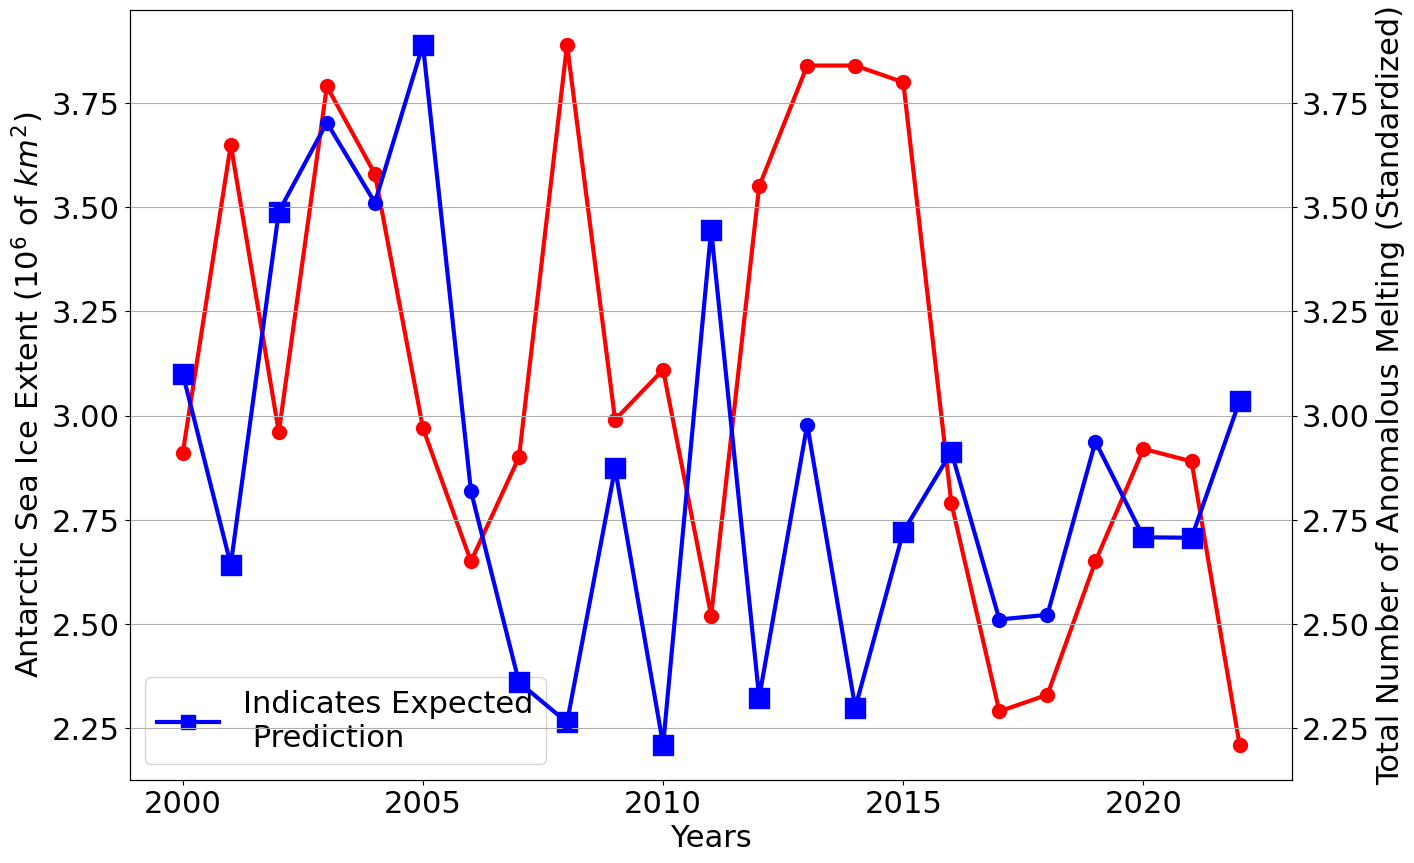

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D



years_ice_extent = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
ice_extent = [2.91, 3.65, 2.96, 3.79, 3.58, 2.97, 2.65, 2.9, 3.89, 2.99, 3.11, 2.52, 3.55, 3.84, 3.84, 3.8, 2.79, 2.29, 2.33, 2.65, 2.92, 2.89, 2.21]


year_sums ={
    2000: 443671,
    2001: 433171,
    2002: 452575,
    2003: 457478,
    2004: 453078,
    2005: 461757,
    2006: 437217,
    2007: 426708,
    2008: 424507,
    2009: 438468,
    2010: 423278,
    2011: 451592,
    2012: 425869,
    2013: 440876,
    2014: 425316,
    2015: 434988,
    2016: 439387,
    2017: 430161,
    2018: 430419,
    2019: 439939,
    2020: 434681,
    2021: 434654,
    2022: 442166
}


# Sort the dictionary by keys (years)
sorted_year_sums = dict(sorted(year_sums.items()))

# Extract keys (years) and values (total number of negative anomalies)
years_anomalies = list(sorted_year_sums.keys())
anomalies_per_year = list(sorted_year_sums.values())

# Standardize the anomalies_per_year to the range of ice_extent
min_ice_extent = np.min(ice_extent)
max_ice_extent = np.max(ice_extent)
standardized_anomalies = np.interp(anomalies_per_year, (np.min(anomalies_per_year), np.max(anomalies_per_year)), (min_ice_extent, max_ice_extent))

# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(15, 10))


f_size = 22
marker_size = 10
# Plotting the first set of data on the primary y-axis
ax1.plot(years_ice_extent, ice_extent, marker='o',markersize=marker_size ,linewidth=3, linestyle='-', color='r', label='Antarctic Sea Ice Extent')
ax1.set_xlabel('Years', fontsize=f_size)
ax1.set_ylabel('Antarctic Sea Ice Extent ($10^6$ of $km^2$)', color='black', fontsize=f_size)
ax1.tick_params(axis='y', labelcolor='black')
ax1.tick_params(axis='x', labelsize=f_size)
ax1.tick_params(axis='y', labelsize=f_size)

# Create a secondary y-axis and plot the standardized second set of data
ax2 = ax1.twinx()
ax2.plot(years_anomalies, standardized_anomalies,markersize=marker_size,  marker='o',linewidth=3, linestyle='-', color='b', label='Total Number of Negative Anomalies (Standardized)')
ax2.set_ylabel('Total Number of Anomalous Melting (Standardized)', color='black', fontsize=f_size)
ax2.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelsize=f_size)

# Highlight specific years with markers
selected_years = [2000,2001,2002,2005,2007,2008,2009,2010,2011, 2012,2014, 2015,2016, 2020,2021,2022]
for year in selected_years:
    index_ice_extent = years_ice_extent.index(year)
    index_anomalies = years_anomalies.index(year)
    #ax1.scatter(year, ice_extent[index_ice_extent], color='r', marker='s', s=100, label=f'Marker for {year}')
    ax2.scatter(year, standardized_anomalies[index_anomalies], color='b', marker='s', s=200)
    
legend_elements = [
    Line2D([0], [0], color='blue', marker='s',markersize=marker_size, linestyle='-', linewidth=3, label='Indicates Expected\n Prediction')
]
ax1.legend(handles=legend_elements, loc='lower left', fontsize=f_size)


plt.grid(True)

plt.savefig('combined_plot_with_markers.png', bbox_inches='tight')
plt.show()


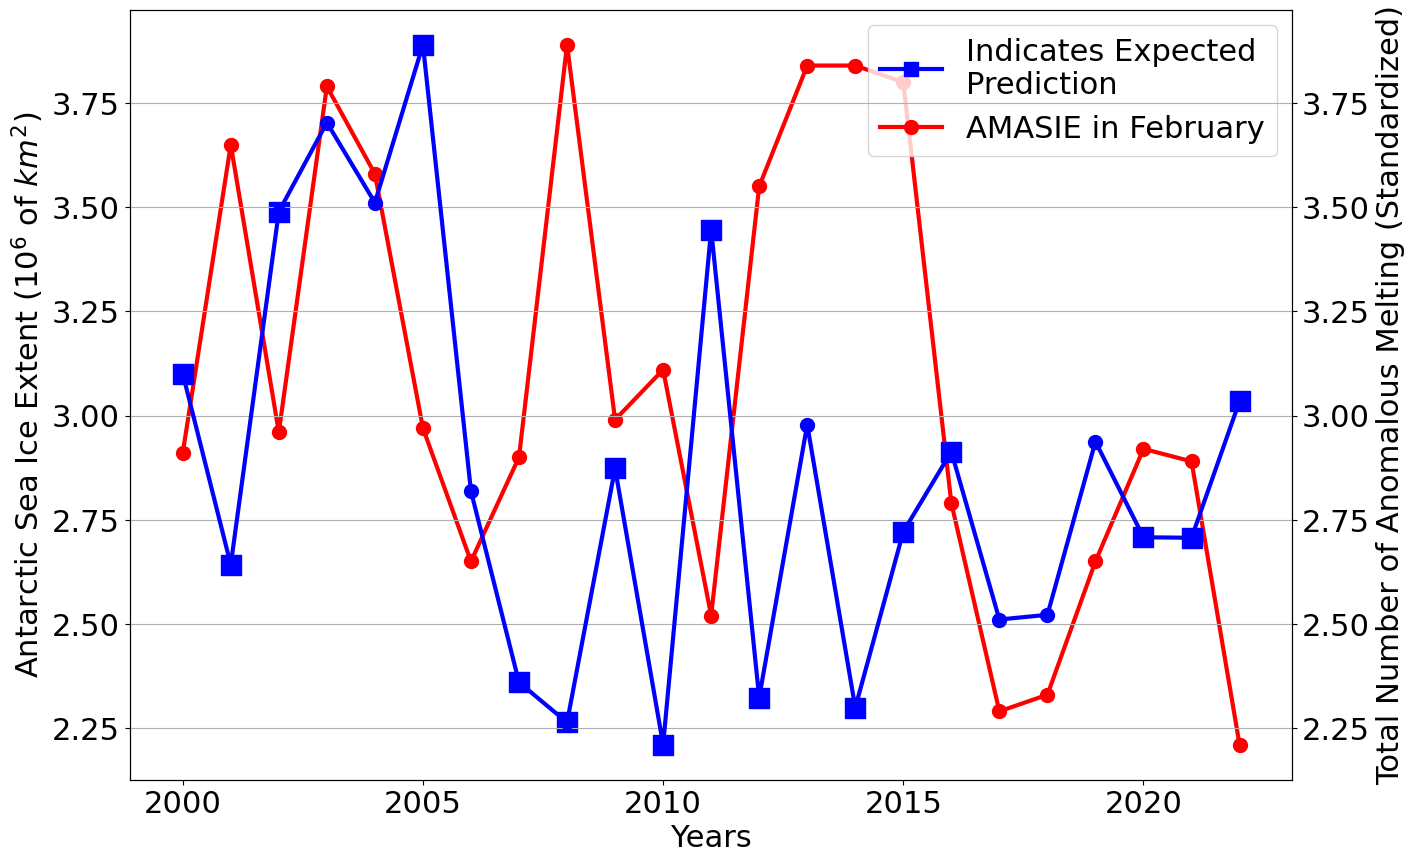

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

years_ice_extent = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
ice_extent = [2.91, 3.65, 2.96, 3.79, 3.58, 2.97, 2.65, 2.9, 3.89, 2.99, 3.11, 2.52, 3.55, 3.84, 3.84, 3.8, 2.79, 2.29, 2.33, 2.65, 2.92, 2.89, 2.21]

year_sums = {
    2000: 443671,
    2001: 433171,
    2002: 452575,
    2003: 457478,
    2004: 453078,
    2005: 461757,
    2006: 437217,
    2007: 426708,
    2008: 424507,
    2009: 438468,
    2010: 423278,
    2011: 451592,
    2012: 425869,
    2013: 440876,
    2014: 425316,
    2015: 434988,
    2016: 439387,
    2017: 430161,
    2018: 430419,
    2019: 439939,
    2020: 434681,
    2021: 434654,
    2022: 442166
}

# Sort the dictionary by keys (years)
sorted_year_sums = dict(sorted(year_sums.items()))

# Extract keys (years) and values (total number of negative anomalies)
years_anomalies = list(sorted_year_sums.keys())
anomalies_per_year = list(sorted_year_sums.values())

# Standardize the anomalies_per_year to the range of ice_extent
min_ice_extent = np.min(ice_extent)
max_ice_extent = np.max(ice_extent)
standardized_anomalies = np.interp(anomalies_per_year, (np.min(anomalies_per_year), np.max(anomalies_per_year)), (min_ice_extent, max_ice_extent))

# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(15, 10))

f_size = 22
marker_size = 10

# Plotting the first set of data on the primary y-axis
ax1.plot(years_ice_extent, ice_extent, marker='o', markersize=marker_size, linewidth=3, linestyle='-', color='r', label='Antarctic Sea Ice Extent')
ax1.set_xlabel('Years', fontsize=f_size)
ax1.set_ylabel('Antarctic Sea Ice Extent ($10^6$ of $km^2$)', color='black', fontsize=f_size)
ax1.tick_params(axis='y', labelcolor='black')
ax1.tick_params(axis='x', labelsize=f_size)
ax1.tick_params(axis='y', labelsize=f_size)

# Create a secondary y-axis and plot the standardized second set of data
ax2 = ax1.twinx()
ax2.plot(years_anomalies, standardized_anomalies, markersize=marker_size, marker='o', linewidth=3, linestyle='-', color='b', label='Total Number of Negative Anomalies (Standardized)')
ax2.set_ylabel('Total Number of Anomalous Melting (Standardized)', color='black', fontsize=f_size)
ax2.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelsize=f_size)

# Highlight specific years with markers
selected_years = [2000, 2001, 2002, 2005, 2007, 2008, 2009, 2010, 2011, 2012, 2014, 2015, 2016, 2020, 2021, 2022]
for year in selected_years:
    index_ice_extent = years_ice_extent.index(year)
    index_anomalies = years_anomalies.index(year)
    ax2.scatter(year, standardized_anomalies[index_anomalies], color='b', marker='s', s=200)

# Legends
legend_elements = [
    Line2D([0], [0], color='blue', marker='s', markersize=marker_size, linestyle='-', linewidth=3, label='Indicates Expected\nPrediction'),
    Line2D([0], [0], color='red', marker='o', markersize=marker_size, linestyle='-', linewidth=3, label='AMASIE in February')
]
ax1.legend(handles=legend_elements, loc='upper right', fontsize=f_size)

plt.grid(True)
plt.savefig('combined_plot_with_markers_two_module.png', bbox_inches='tight')

In [15]:

Average Precision: 0.9799
Average Recall: 0.9376
Average F1 Score: 0.9582
Average Accuracy: 0.9220

Confusion Matrix:
[[95867801  6341047]
 [ 1941542  2020554]]


# Print the confusion matrix
Average Precision: 0.9802
Average Recall: 0.9362
Average F1 Score: 0.9576
Average Accuracy: 0.9209

Confusion Matrix:
[[95732994  6487566]
 [ 1915452  2034932]]





Average Precision: 0.9802
Average Recall: 0.9363
Average F1 Score: 0.9577
Average Accuracy: 0.9210


Confusion Matrix:
[[95742564  6477996]
 [ 1909563  2040821]]
 
 
 
 
 Average Precision: 0.9807
Average Recall: 0.9371
Average F1 Score: 0.9583
Average Accuracy: 0.9222

Confusion Matrix:
[[95912896  6395824]
 [ 1869020  1993204]]

SyntaxError: invalid syntax (47524362.py, line 1)

In [ ]:
conf_matrix = confusion_matrix(y_test_all, y_pred_all,labels=[1,0])

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[96129310  6206210]
 [ 1900981  1934443]]


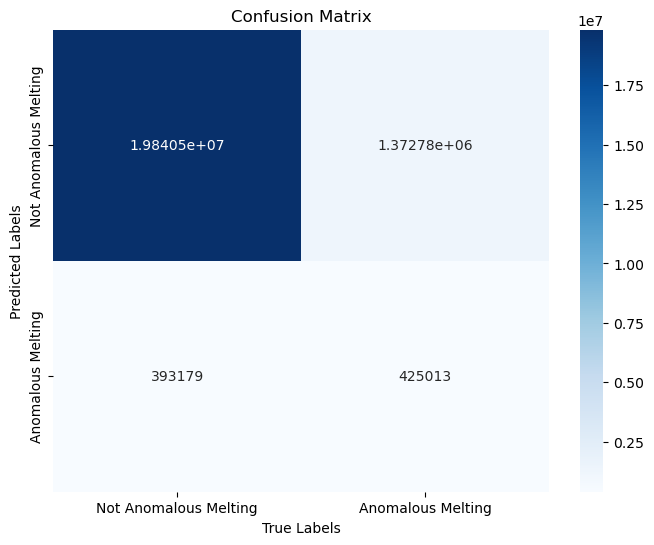

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns



# Define class labels
class_labels = ['Not Anomalous Melting', 'Anomalous Melting']

# Calculate confusion matrix
conf_matrix1 = conf_matrix

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Predicted Labels')
plt.xlabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
print(y_test_all.count(1))
print(y_test_all.count(0))


print(y_pred_all.count(1))
print(y_pred_all.count(0))

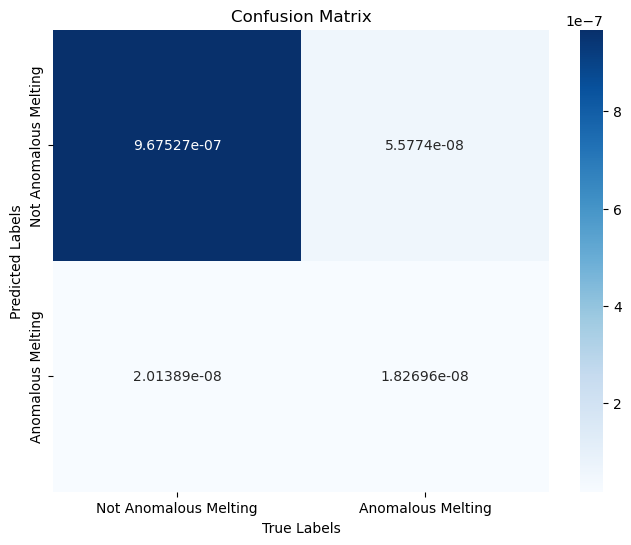

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns



# Define class labels
class_labels = ['Not Anomalous Melting', 'Anomalous Melting']

# Calculate confusion matrix
conf_matrix1 = conf_matrix

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Predicted Labels')
plt.xlabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
